In [1]:
from get_true_bvs import *
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from scipy.stats import linregress
import matplotlib.patches as patches
from get_track_density import *
from clusters import *
from read_kevin_bv_tracks import *

In [2]:
# plt.rcParams['figure.dpi'] = 300
# plt.rcParams['savefig.dpi'] = 300
# plt.rcParams["figure.figsize"] = [3, 3]
# plt.rcParams['font.size'] = 12

In [3]:
bvs = get_true_bvs(init_in_reg=True)
bvs = get_non_tcs(bvs, False)

622 init in reg
613 tracks not TCs


In [4]:
cluster_labels, cluster_centers, cluster_names, sub_cix, clust_bvs=read_clusters(bvs)

reading cluster data from /gws/nopw/j04/forsea/users/jcrook/BorneoVortex/Clusters/
[1 2 3 4 5]
cluster that was subclustered is 0


In [5]:
dic = {clust_bvs[n] : cluster_labels[n] for n in np.arange(0,585)}
nborneo = [bv for bv, label in dic.items() if label == 1]
scs = [bv for bv, label in dic.items() if label == 2]
cshaped = [bv for bv, label in dic.items() if label == 3]
wborneo = [bv for bv, label in dic.items() if label == 4]
nwborneo = [bv for bv, label in dic.items() if label == 5]

15415 days from 05/01/1980  to 21/03/2022
7729 days in Oct-Mar
333  BVs in Cl 1 
145  BVs in Cl 2 N Borneo
107  BVs in Cl 3 S China Sea
98  BVs in Cl 1.a C-shaped
107  BVs in Cl 1.b W Borneo
128  BVs in Cl 1.c NW Borneo


<module 'matplotlib.pyplot' from '/opt/jaspy/lib/python3.11/site-packages/matplotlib/pyplot.py'>

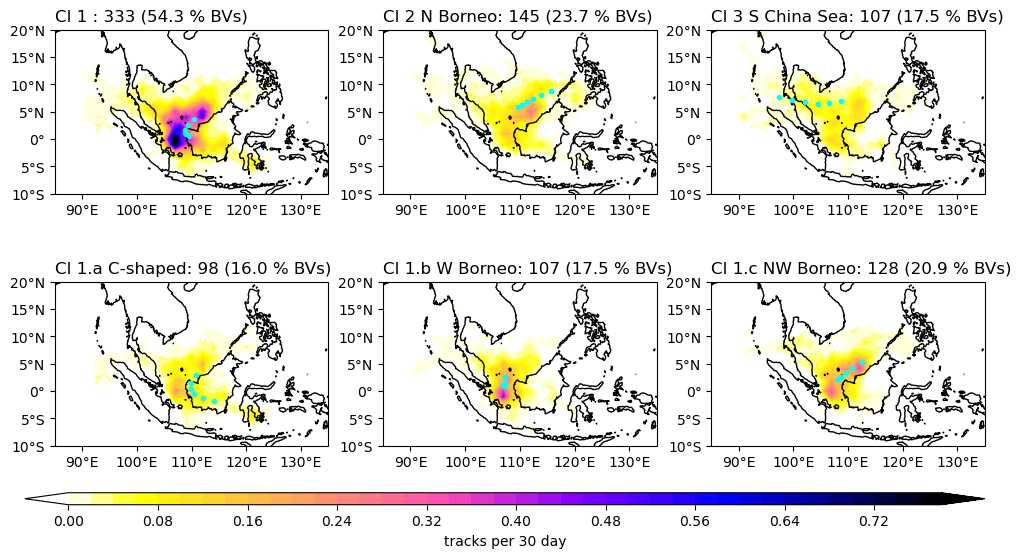

In [6]:
plot_cluster_densities(bvs, cluster_labels, cluster_centers, cluster_names, sub_cix)

In [7]:
lons = np.arange(90,130,1)
lats = np.arange(-10,15,1)
nrows = 1 
ncols = 1
density_levels=np.arange(0, 3.2,0.1)

In [10]:
def densityplotmain(type, title):

    nbvs=len(type)
    
    # work out the number of days over which the BVs exist - needed for densities
    start_dates=np.array([type[n].track_times[0] for n in range(len(type))])
    end_dates=np.array([type[n].track_times[-1] for n in range(len(type))])
    start_date=np.amin(start_dates)
    end_date=np.amax(end_dates)
    deltat=(end_date-start_date)
    ndays=deltat.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays, start_date.strftime('days from %d/%m/%Y '), end_date.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days=np.asarray([start_date+dt.timedelta(days=day) for day in range(ndays)])
    in_seas=np.asarray([(date.month<4) | (date.month>=10) for date in all_days])
    ix_seas=np.where(in_seas)
    ndays=len(ix_seas[0])
    print(ndays, 'days in Oct-Mar')
    
    fig = plt.figure(figsize=(10,10))
    densitymain, this_nbvs=get_track_density(type, lons, lats, ndays)
    print(this_nbvs, ' BVs in ––')
    
    con,ax=plot_density(fig, nrows,ncols, 1, 30*densitymain, density_levels/5, 'gnuplot2_r', title, lons,lats, extend='both')
    this_cluster_centers=cluster_centers[4,:]
    cbar = fig.colorbar(con, orientation='horizontal')
    cbar.set_label('tracks per 30 day')
    # print(densitymain)

15358 days from 05/01/1980  to 23/01/2022
7672 days in Oct-Mar
98  BVs in ––


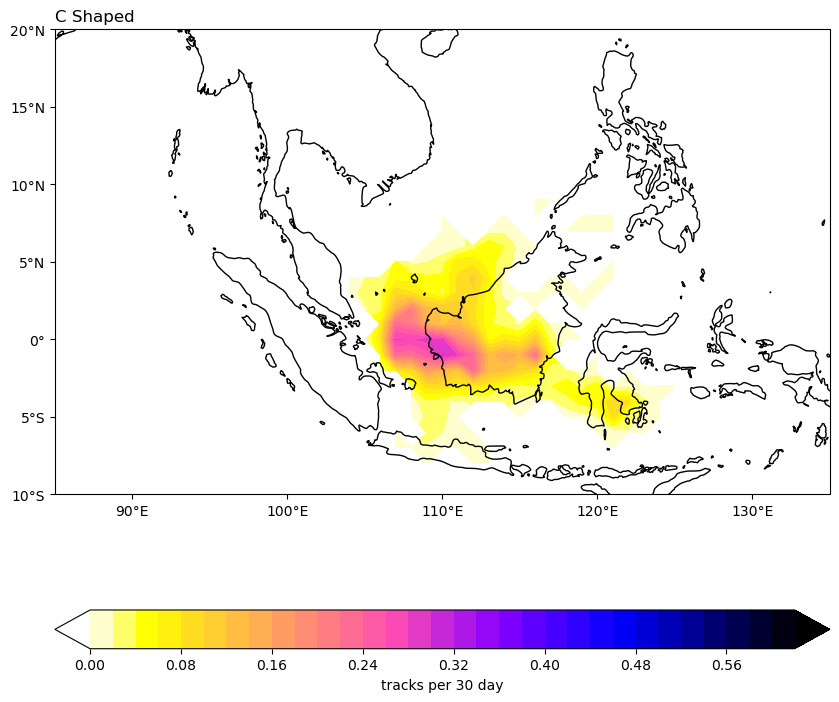

In [11]:
densityplotmain(cshaped, 'C Shaped')

In [12]:
def density_firstdec(type, title):
    
    years = [type[n].track_times[0] for n in range(len(type))]
    
    firstdecade = np.array([date for date in years if 1980 <= date.year <= 1989])

    nbvs=len(type)

    # work out the number of days over which the BVs exist - needed for densities
    start_dates=np.array(firstdecade)
    end_dates=np.array(firstdecade)
    start_date=np.amin(start_dates)
    end_date=np.amax(end_dates)
    deltat=(end_date-start_date)
    ndays=deltat.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays, start_date.strftime('days from %d/%m/%Y '), end_date.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days=np.asarray([start_date+dt.timedelta(days=day) for day in range(ndays)])
    in_seas=np.asarray([(date.month<4) | (date.month>=10) for date in all_days])
    ix_seas=np.where(in_seas)
    ndays=len(ix_seas[0])
    print(ndays, 'days in Oct-Mar')
    
    fig = plt.figure(figsize=(10,10))
    densitymain, this_nbvs=get_track_density(type, lons, lats, ndays)
    print(this_nbvs, ' BVs in WBorneo')
    # title=cluster_title+': {c:d} ({pc:.1f} % BVs)'.format(c=this_nbvs, pc=100*this_nbvs/nbvs)
    
    con,ax=plot_density(fig, nrows,ncols, 1, 30*densitymain, density_levels, 'gnuplot2_r', title, lons,lats, extend='both')
    this_cluster_centers=cluster_centers[4,:]
    cbar = fig.colorbar(con, orientation='horizontal')
    cbar.set_label('tracks per 30 day')

2944 days from 24/11/1981  to 16/12/1989
1480 days in Oct-Mar
107  BVs in WBorneo


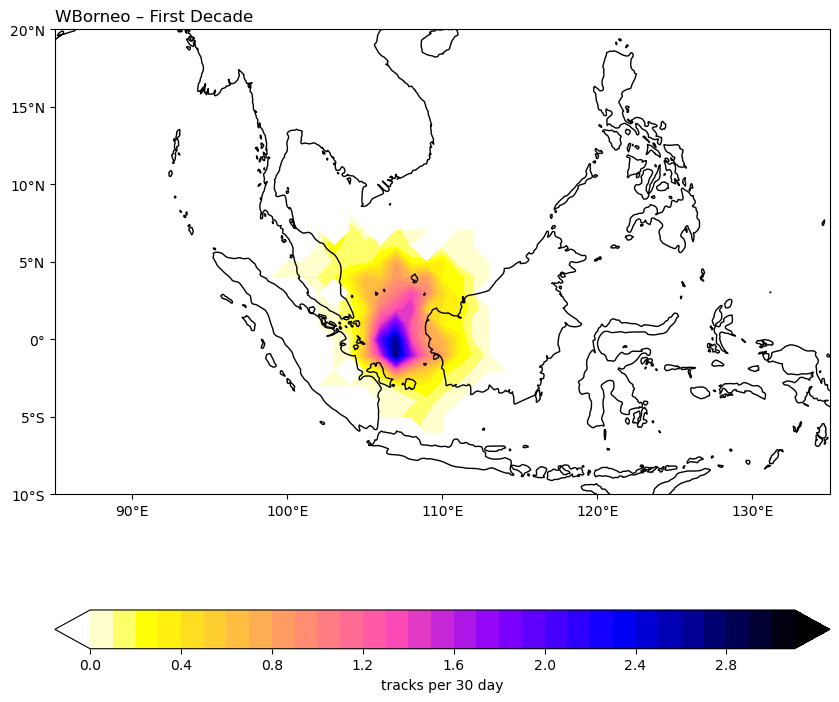

In [15]:
density_firstdec(wborneo, 'WBorneo – First Decade')

In [13]:
def density_seconddec(type, title):
    
    years = [type[n].track_times[0] for n in range(len(type))]
    
    seconddecade = np.array([date for date in years if 1990 <= date.year <= 1999])

    nbvs=len(type)

    # work out the number of days over which the BVs exist - needed for densities
    start_dates=np.array(seconddecade)
    end_dates=np.array(seconddecade)
    start_date=np.amin(start_dates)
    end_date=np.amax(end_dates)
    deltat=(end_date-start_date)
    ndays=deltat.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays, start_date.strftime('days from %d/%m/%Y '), end_date.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days=np.asarray([start_date+dt.timedelta(days=day) for day in range(ndays)])
    in_seas=np.asarray([(date.month<4) | (date.month>=10) for date in all_days])
    ix_seas=np.where(in_seas)
    ndays=len(ix_seas[0])
    print(ndays, 'days in Oct-Mar')
    
    fig = plt.figure(figsize=(10,10))
    densitymain, this_nbvs=get_track_density(type, lons, lats, ndays)
    print(this_nbvs, ' BVs in WBorneo')
    # title=cluster_title+': {c:d} ({pc:.1f} % BVs)'.format(c=this_nbvs, pc=100*this_nbvs/nbvs)
    
    con,ax=plot_density(fig, nrows,ncols, 1, 30*densitymain, density_levels, 'gnuplot2_r', title, lons,lats, extend='both')
    this_cluster_centers=cluster_centers[4,:]
    cbar = fig.colorbar(con, orientation='horizontal')
    cbar.set_label('tracks per 30 day')

In [15]:
def density_thirddec(type, title):
    
    years = [type[n].track_times[0] for n in range(len(type))]
    
    thirddecade = np.array([date for date in years if 2000 <= date.year <= 2009])

    nbvs=len(type)

    # work out the number of days over which the BVs exist - needed for densities
    start_dates=np.array(thirddecade)
    end_dates=np.array(thirddecade)
    start_date=np.amin(start_dates)
    end_date=np.amax(end_dates)
    deltat=(end_date-start_date)
    ndays=deltat.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays, start_date.strftime('days from %d/%m/%Y '), end_date.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days=np.asarray([start_date+dt.timedelta(days=day) for day in range(ndays)])
    in_seas=np.asarray([(date.month<4) | (date.month>=10) for date in all_days])
    ix_seas=np.where(in_seas)
    ndays=len(ix_seas[0])
    print(ndays, 'days in Oct-Mar')
    
    fig = plt.figure(figsize=(10,10))
    densitymain, this_nbvs=get_track_density(type, lons, lats, ndays)
    print(this_nbvs, ' BVs in WBorneo')
    # title=cluster_title+': {c:d} ({pc:.1f} % BVs)'.format(c=this_nbvs, pc=100*this_nbvs/nbvs)
    
    con,ax=plot_density(fig, nrows,ncols, 1, 30*densitymain, density_levels, 'gnuplot2_r', title, lons,lats, extend='both')
    this_cluster_centers=cluster_centers[4,:]
    cbar = fig.colorbar(con, orientation='horizontal')
    cbar.set_label('tracks per 30 day')

In [16]:
def density_fourthdec(type, title):
    
    years = [type[n].track_times[0] for n in range(len(type))]
    
    fourthdecade = np.array([date for date in years if 2010 <= date.year <= 2019])

    nbvs=len(type)

    # work out the number of days over which the BVs exist - needed for densities
    start_dates=np.array(fourthdecade)
    end_dates=np.array(fourthdecade)
    start_date=np.amin(start_dates)
    end_date=np.amax(end_dates)
    deltat=(end_date-start_date)
    ndays=deltat.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays, start_date.strftime('days from %d/%m/%Y '), end_date.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days=np.asarray([start_date+dt.timedelta(days=day) for day in range(ndays)])
    in_seas=np.asarray([(date.month<4) | (date.month>=10) for date in all_days])
    ix_seas=np.where(in_seas)
    ndays=len(ix_seas[0])
    print(ndays, 'days in Oct-Mar')
    
    fig = plt.figure(figsize=(10,10))
    densitymain, this_nbvs=get_track_density(type, lons, lats, ndays)
    print(this_nbvs, ' BVs in WBorneo')
    # title=cluster_title+': {c:d} ({pc:.1f} % BVs)'.format(c=this_nbvs, pc=100*this_nbvs/nbvs)
    
    con,ax=plot_density(fig, nrows,ncols, 1, 30*densitymain, density_levels, 'gnuplot2_r', title, lons,lats, extend='both')
    this_cluster_centers=cluster_centers[4,:]
    cbar = fig.colorbar(con, orientation='horizontal')
    cbar.set_label('tracks per 30 day')

In [16]:
density_levels2 = np.arange(-0.200, 0.0002, 0.02)

In [17]:
density_levels3 = np.arange(0, 0.1002, 0.01)

In [18]:
density_levels4 = np.arange(-0.2, 0.2002, 0.02)

In [19]:
def difference1(type, title): #4-1
    
    years = [type[n].track_times[0] for n in range(len(type))]
    
    
    firstdecade = np.array([date for date in years if 1980 <= date.year <= 1989])
    fourthdecade = np.array([date for date in years if 2010 <= date.year <= 2019])
    
    nbvs=len(type)

    # work out the number of days over which the BVs exist - needed for densities
    start_dates1=np.array(firstdecade)
    end_dates1=np.array(firstdecade)
    start_date1=np.amin(start_dates1)
    end_date1=np.amax(end_dates1)
    deltat1=(end_date1-start_date1)
    ndays1=deltat1.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays1, start_date1.strftime('days from %d/%m/%Y '), end_date1.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days1=np.asarray([start_date1+dt.timedelta(days=day) for day in range(ndays1)])
    in_seas1=np.asarray([(date.month<4) | (date.month>=10) for date in all_days1])
    ix_seas1=np.where(in_seas1)
    ndays1=len(ix_seas1[0])
    print(ndays1, 'days in Oct-Mar')
    
    densityfirst, this_nbvs=get_track_density(type, lons, lats, ndays1)

        # work out the number of days over which the BVs exist - needed for densities
    start_dates2=np.array(fourthdecade)
    end_dates2=np.array(fourthdecade)
    start_date2=np.amin(start_dates2)
    end_date2=np.amax(end_dates2)
    deltat2=(end_date2-start_date2)
    ndays2=deltat2.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays2, start_date2.strftime('days from %d/%m/%Y '), end_date2.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days2=np.asarray([start_date2+dt.timedelta(days=day) for day in range(ndays2)])
    in_seas2=np.asarray([(date.month<4) | (date.month>=10) for date in all_days2])
    ix_seas2=np.where(in_seas2)
    ndays2=len(ix_seas2[0])
    print(ndays2, 'days in Oct-Mar')
    
    densityfourth, this_nbvs=get_track_density(type, lons, lats, ndays2)

    difference = densityfourth - densityfirst
    
    fig = plt.figure(figsize=(10,10))
    # title=cluster_title+': {c:d} ({pc:.1f} % BVs)'.format(c=this_nbvs, pc=100*this_nbvs/nbvs)
    con,ax=plot_density(fig, nrows,ncols, 1, 30*difference, density_levels4, 'RdBu_r', title, lons,lats, extend='both')
    cbar = fig.colorbar(con, orientation='horizontal')
    cbar.set_label('tracks per 30 day')
    plt.savefig('woo')
    # print(densityfirst)

3590 days from 23/01/1980  to 22/11/1989
1760 days in Oct-Mar
3559 days from 13/03/2010  to 11/12/2019
1729 days in Oct-Mar


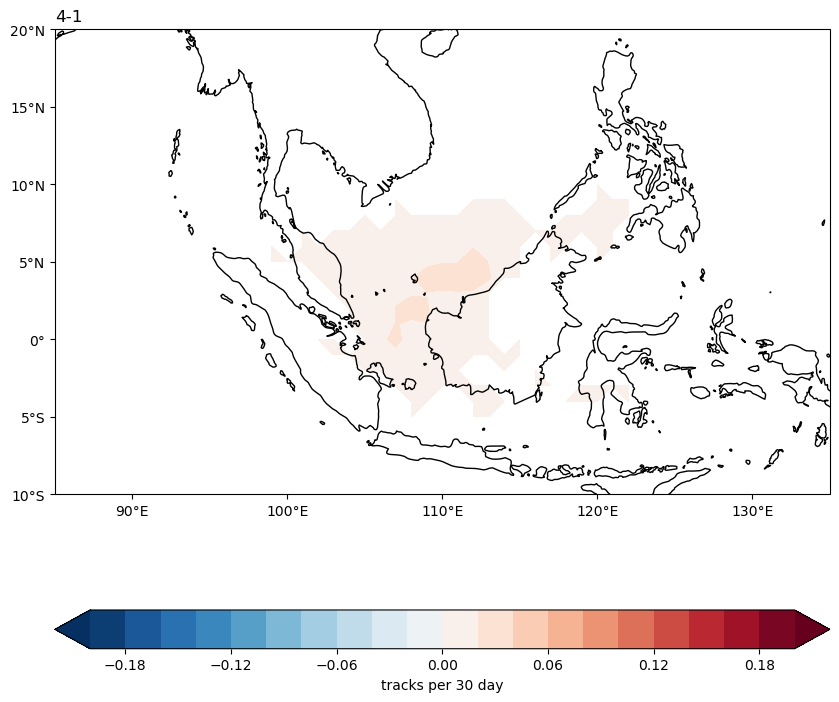

In [21]:
difference1(nwborneo, '4-1') 

In [22]:
def difference2(type, title):
    
    years = [type[n].track_times[0] for n in range(len(type))]
    
    
    thirddecade = np.array([date for date in years if 1997 <= date.year <= 2007])
    fourthdecade = np.array([date for date in years if 2010 <= date.year <= 2019])
    
    nbvs=len(type)

    # work out the number of days over which the BVs exist - needed for densities
    start_dates1=np.array(thirddecade)
    end_dates1=np.array(thirddecade)
    start_date1=np.amin(start_dates1)
    end_date1=np.amax(end_dates1)
    deltat1=(end_date1-start_date1)
    ndays1=deltat1.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays1, start_date1.strftime('days from %d/%m/%Y '), end_date1.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days1=np.asarray([start_date1+dt.timedelta(days=day) for day in range(ndays1)])
    in_seas1=np.asarray([(date.month<4) | (date.month>=10) for date in all_days1])
    ix_seas1=np.where(in_seas1)
    ndays1=len(ix_seas1[0])
    print(ndays1, 'days in Oct-Mar')
    
    densitythird, this_nbvs=get_track_density(type, lons, lats, ndays1)

        # work out the number of days over which the BVs exist - needed for densities
    start_dates2=np.array(fourthdecade)
    end_dates2=np.array(fourthdecade)
    start_date2=np.amin(start_dates2)
    end_date2=np.amax(end_dates2)
    deltat2=(end_date2-start_date2)
    ndays2=deltat2.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays2, start_date2.strftime('days from %d/%m/%Y '), end_date2.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days2=np.asarray([start_date2+dt.timedelta(days=day) for day in range(ndays2)])
    in_seas2=np.asarray([(date.month<4) | (date.month>=10) for date in all_days2])
    ix_seas2=np.where(in_seas2)
    ndays2=len(ix_seas2[0])
    print(ndays2, 'days in Oct-Mar')
    
    densityfourth, this_nbvs=get_track_density(type, lons, lats, ndays2)

    difference =  - densityfourth + densitythird 
    
    fig = plt.figure(figsize=(10,10))
    # title=cluster_title+': {c:d} ({pc:.1f} % BVs)'.format(c=this_nbvs, pc=100*this_nbvs/nbvs)
    con,ax=plot_density(fig, nrows,ncols, 1, 30*difference, density_levels4, 'RdBu_r', title, lons,lats, extend='both')
    cbar = fig.colorbar(con, orientation='horizontal')
    cbar.set_label('tracks per 30 day')
    plt.savefig('woo')
    # print(difference)

3975 days from 06/02/1997  to 26/12/2007
1962 days in Oct-Mar
3363 days from 07/10/2010  to 22/12/2019
1716 days in Oct-Mar


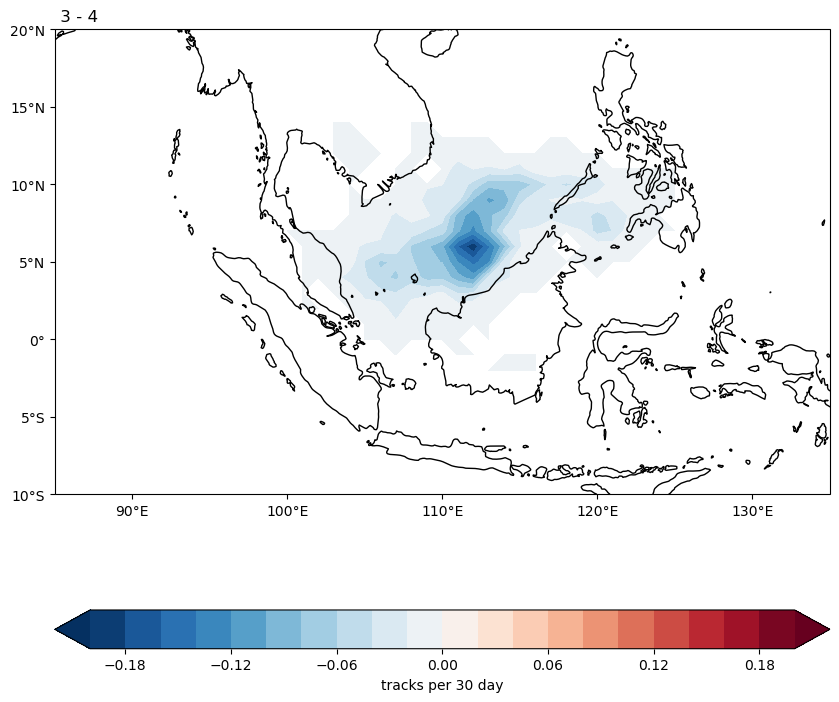

In [23]:
difference2(nborneo, ' 3 - 4')

In [24]:
def difference3(type, title): # 2-1
    
    years = [type[n].track_times[0] for n in range(len(type))]
    
    
    seconddecade = np.array([date for date in years if 1990 <= date.year <= 1999])
    firstdecade = np.array([date for date in years if 1980 <= date.year <= 1989])
    
    nbvs=len(type)

    # work out the number of days over which the BVs exist - needed for densities
    start_dates1=np.array(seconddecade)
    end_dates1=np.array(seconddecade)
    start_date1=np.amin(start_dates1)
    end_date1=np.amax(end_dates1)
    deltat1=(end_date1-start_date1)
    ndays1=deltat1.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays1, start_date1.strftime('days from %d/%m/%Y '), end_date1.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days1=np.asarray([start_date1+dt.timedelta(days=day) for day in range(ndays1)])
    in_seas1=np.asarray([(date.month<4) | (date.month>=10) for date in all_days1])
    ix_seas1=np.where(in_seas1)
    ndays1=len(ix_seas1[0])
    print(ndays1, 'days in Oct-Mar')
    
    densitysecond, this_nbvs=get_track_density(type, lons, lats, ndays1)

        # work out the number of days over which the BVs exist - needed for densities
    start_dates2=np.array(firstdecade)
    end_dates2=np.array(firstdecade)
    start_date2=np.amin(start_dates2)
    end_date2=np.amax(end_dates2)
    deltat2=(end_date2-start_date2)
    ndays2=deltat2.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays2, start_date2.strftime('days from %d/%m/%Y '), end_date2.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days2=np.asarray([start_date2+dt.timedelta(days=day) for day in range(ndays2)])
    in_seas2=np.asarray([(date.month<4) | (date.month>=10) for date in all_days2])
    ix_seas2=np.where(in_seas2)
    ndays2=len(ix_seas2[0])
    print(ndays2, 'days in Oct-Mar')
    
    densityfirst, this_nbvs=get_track_density(type, lons, lats, ndays2)

    difference = densitysecond - densityfirst
    
    fig = plt.figure(figsize=(10,10))
    # title=cluster_title+': {c:d} ({pc:.1f} % BVs)'.format(c=this_nbvs, pc=100*this_nbvs/nbvs)
    con,ax=plot_density(fig, nrows,ncols, 1, 30*difference, density_levels4, 'RdBu_r', title, lons,lats, extend='both')
    cbar = fig.colorbar(con, orientation='horizontal')
    cbar.set_label('tracks per 30 day')
    plt.savefig('woo')
    # print(difference)

3624 days from 03/01/1990  to 07/12/1999
1794 days in Oct-Mar
2944 days from 24/11/1981  to 16/12/1989
1480 days in Oct-Mar


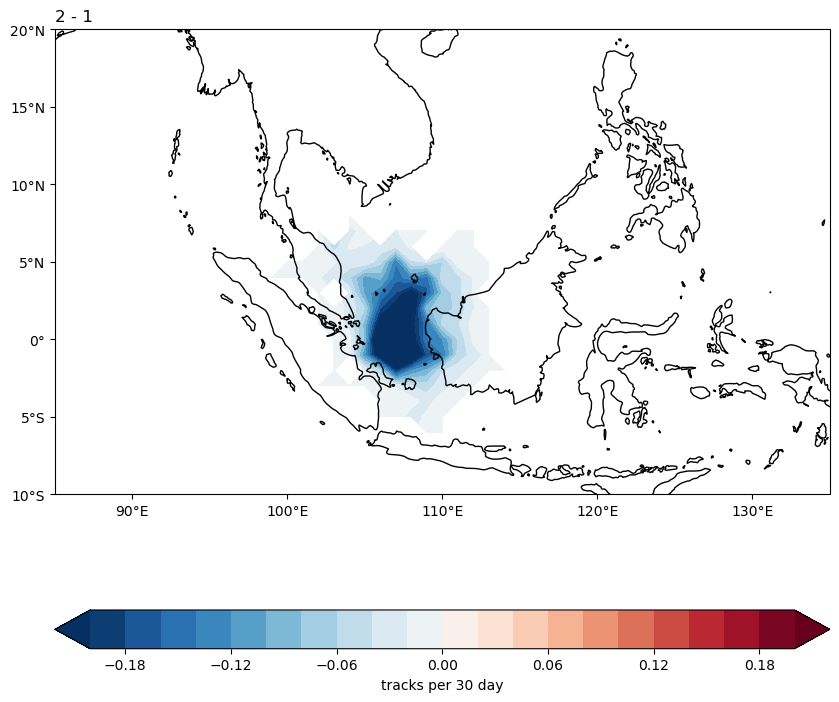

In [25]:
difference3(wborneo, '2 - 1 ') 

In [26]:
def difference4(type, title): # 3- 2
    
    years = [type[n].track_times[0] for n in range(len(type))]
    
    
    seconddecade = np.array([date for date in years if 1990 <= date.year <= 1999])
    thirddecade = np.array([date for date in years if 2000 <= date.year <= 2010])
    
    nbvs=len(type)

    # work out the number of days over which the BVs exist - needed for densities
    start_dates1=np.array(seconddecade)
    end_dates1=np.array(seconddecade)
    start_date1=np.amin(start_dates1)
    end_date1=np.amax(end_dates1)
    deltat1=(end_date1-start_date1)
    ndays1=deltat1.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays1, start_date1.strftime('days from %d/%m/%Y '), end_date1.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days1=np.asarray([start_date1+dt.timedelta(days=day) for day in range(ndays1)])
    in_seas1=np.asarray([(date.month<4) | (date.month>=10) for date in all_days1])
    ix_seas1=np.where(in_seas1)
    ndays1=len(ix_seas1[0])
    print(ndays1, 'days in Oct-Mar')
    
    densitysecond, this_nbvs=get_track_density(type, lons, lats, ndays1)

        # work out the number of days over which the BVs exist - needed for densities
    start_dates2=np.array(thirddecade)
    end_dates2=np.array(thirddecade)
    start_date2=np.amin(start_dates2)
    end_date2=np.amax(end_dates2)
    deltat2=(end_date2-start_date2)
    ndays2=deltat2.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays2, start_date2.strftime('days from %d/%m/%Y '), end_date2.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days2=np.asarray([start_date2+dt.timedelta(days=day) for day in range(ndays2)])
    in_seas2=np.asarray([(date.month<4) | (date.month>=10) for date in all_days2])
    ix_seas2=np.where(in_seas2)
    ndays2=len(ix_seas2[0])
    print(ndays2, 'days in Oct-Mar')
    
    densitythird, this_nbvs=get_track_density(type, lons, lats, ndays2)

    difference = densitythird - densitysecond
    
    fig = plt.figure(figsize=(10,10))
    # title=cluster_title+': {c:d} ({pc:.1f} % BVs)'.format(c=this_nbvs, pc=100*this_nbvs/nbvs)
    con,ax=plot_density(fig, nrows,ncols, 1, 30*difference, density_levels4, 'RdBu_r', title, lons,lats, extend='both')
    cbar = fig.colorbar(con, orientation='horizontal')
    cbar.set_label('tracks per 30 day')
    plt.savefig('woo')
    # print(difference)

2995 days from 10/12/1990  to 22/02/1999
1531 days in Oct-Mar
4002 days from 06/01/2000  to 21/12/2010
1989 days in Oct-Mar


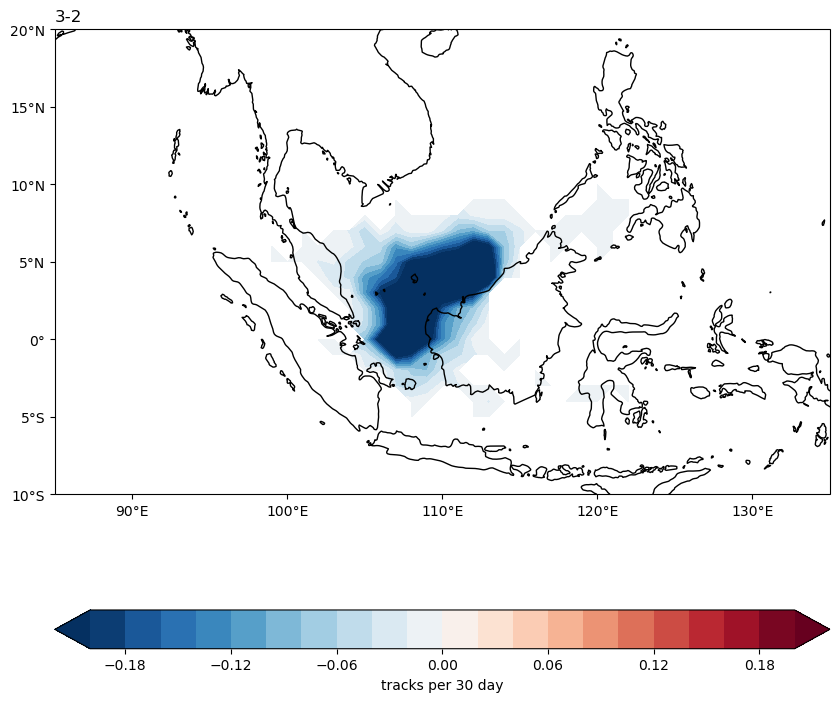

In [27]:
difference4(nwborneo, '3-2')

In [28]:
def difference5(type, title): # 3- 1
    
    years = [type[n].track_times[0] for n in range(len(type))]
    
    
    firstdecade = np.array([date for date in years if 1980 <= date.year <= 1989])
    thirddecade = np.array([date for date in years if 2000 <= date.year <= 2010])
    
    nbvs=len(type)

    # work out the number of days over which the BVs exist - needed for densities
    start_dates1=np.array(firstdecade)
    end_dates1=np.array(firstdecade)
    start_date1=np.amin(start_dates1)
    end_date1=np.amax(end_dates1)
    deltat1=(end_date1-start_date1)
    ndays1=deltat1.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays1, start_date1.strftime('days from %d/%m/%Y '), end_date1.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days1=np.asarray([start_date1+dt.timedelta(days=day) for day in range(ndays1)])
    in_seas1=np.asarray([(date.month<4) | (date.month>=10) for date in all_days1])
    ix_seas1=np.where(in_seas1)
    ndays1=len(ix_seas1[0])
    print(ndays1, 'days in Oct-Mar')
    
    densityfirst, this_nbvs=get_track_density(type, lons, lats, ndays1)

        # work out the number of days over which the BVs exist - needed for densities
    start_dates2=np.array(thirddecade)
    end_dates2=np.array(thirddecade)
    start_date2=np.amin(start_dates2)
    end_date2=np.amax(end_dates2)
    deltat2=(end_date2-start_date2)
    ndays2=deltat2.days # this is including all days of year but we only look at BVs in Oct-Mar
    print(ndays2, start_date2.strftime('days from %d/%m/%Y '), end_date2.strftime('to %d/%m/%Y'))
    # work out how many just in Oct-Mar season
    all_days2=np.asarray([start_date2+dt.timedelta(days=day) for day in range(ndays2)])
    in_seas2=np.asarray([(date.month<4) | (date.month>=10) for date in all_days2])
    ix_seas2=np.where(in_seas2)
    ndays2=len(ix_seas2[0])
    print(ndays2, 'days in Oct-Mar')
    
    densitythird, this_nbvs=get_track_density(type, lons, lats, ndays2)

    difference = densitythird - densityfirst
    
    fig = plt.figure(figsize=(10,10))
    # title=cluster_title+': {c:d} ({pc:.1f} % BVs)'.format(c=this_nbvs, pc=100*this_nbvs/nbvs)
    con,ax=plot_density(fig, nrows,ncols, 1, 30*difference, density_levels4, 'RdBu_r', title, lons,lats, extend='both')
    cbar = fig.colorbar(con, orientation='horizontal')
    cbar.set_label('tracks per 30 day')
    plt.savefig('woo')
    # print(difference)

2944 days from 24/11/1981  to 16/12/1989
1480 days in Oct-Mar
3988 days from 16/01/2000  to 17/12/2010
1975 days in Oct-Mar


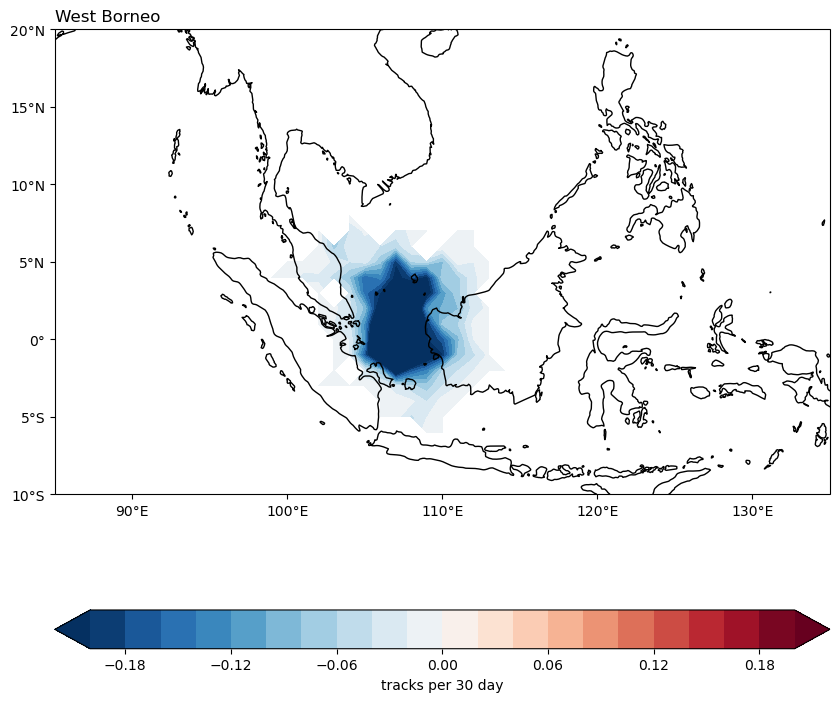

In [30]:
difference5(wborneo, 'West Borneo') #3-1